# Statistics of Streakiness

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Let us assume that you always hit a shot at a certain percentage p and that the probability of hitting the shot does not depend on the history of hits and misses

In [3]:
sample = np.random.binomial(p=0.5,n=1,size=10)
print(sample)

[1 1 0 0 1 1 1 1 1 1]


Let us now analyze this data for streakiness.  How often do we find 2 1s in row? How often do we find 3 1's in a row.

In [4]:
def streakiness(data):
    ones = np.zeros(len(data))
    zeros = np.zeros(len(data))
    state = data[0]
    streak = 1
    for d in data[1:]:
        if d!=state:
            if state == 1:
                ones[streak-1]+=1
            else:
                zeros[streak-1]+=1
            streak = 1
            state = d
        else:
            streak+=1
    return ones,zeros

In [5]:
length = 1000000
ones,zeros = streakiness(np.random.binomial(p=0.5,n=1,size=length))
ones_n = ones/length
zeros_n = zeros/length
x = np.arange(1,len(ones)+1)

<BarContainer object of 10 artists>

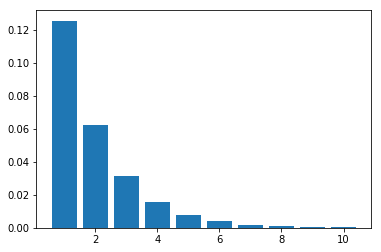

In [6]:
plt.bar(x[:10],ones_n[:10])

In [7]:
print(ones_n[:10])

[0.125571 0.062114 0.031403 0.015578 0.007793 0.003918 0.001936 0.000967
 0.000504 0.000259]


lets compare that to the probabilities that we expect from probability theory:
To find a streak of 4 1s we need a 011110 that occurs with a probability of $p^{4}*(1-p)^2$

In [8]:
p=0.5
t_ones = [p**i*(1-p)**2 for i in range(1,15)]
print(t_ones)

[0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05]


Stephen Curry shot 1585 times in the 2016-2017 season and hit approximately 50% of his shots

In [10]:
print(np.array(t_ones) * 1585/np.arange(3,17))

[6.60416667e+01 2.47656250e+01 9.90625000e+00 4.12760417e+00
 1.76897321e+00 7.73925781e-01 3.43967014e-01 1.54785156e-01
 7.03568892e-02 3.22469076e-02 1.48831881e-02 6.91005162e-03
 3.22469076e-03 1.51157379e-03]


Stephen Curry in the 2016/17 season hit 13 shots in a row (see Stephen Curry notebook).  This event, according to our calculation, has a probability of 0.003 or 0.3%.  This should happen on average every 1/0.003=333th season.  Pretty rare but not impossible.